In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import scipy

def pca(data, num_components):    
    # (1)estimate and substract the mean, 
    # (2) construct the covariance matarix
    # (3) Find the eigenvectors corresponding to the top k eigenvalues
    means = []
    means = np.mean(data,axis=0)#demean down columns
    de_meaned = data-means
    U,S,VT = scipy.linalg.svd(de_meaned)
    V = VT.T
    top_eigenvalues = S[0:num_components]
    top_eigenvectors = V[:,0:num_components]
    return top_eigenvalues, top_eigenvectors
    
data = fetch_olivetti_faces().data

num_components = 20  # Number of principal components
eigenvalues, principal_components = pca(data, num_components)


### Plot the results

Text(0.5, 0, 'Index')

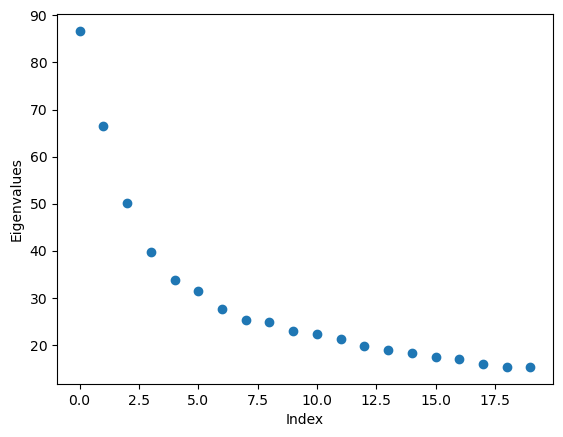

In [17]:
plt.plot(eigenvalues,"o")
plt.ylabel("Eigenvalues")
plt.xlabel("Index")    


Eigenfaces shape: (20, 64, 64)


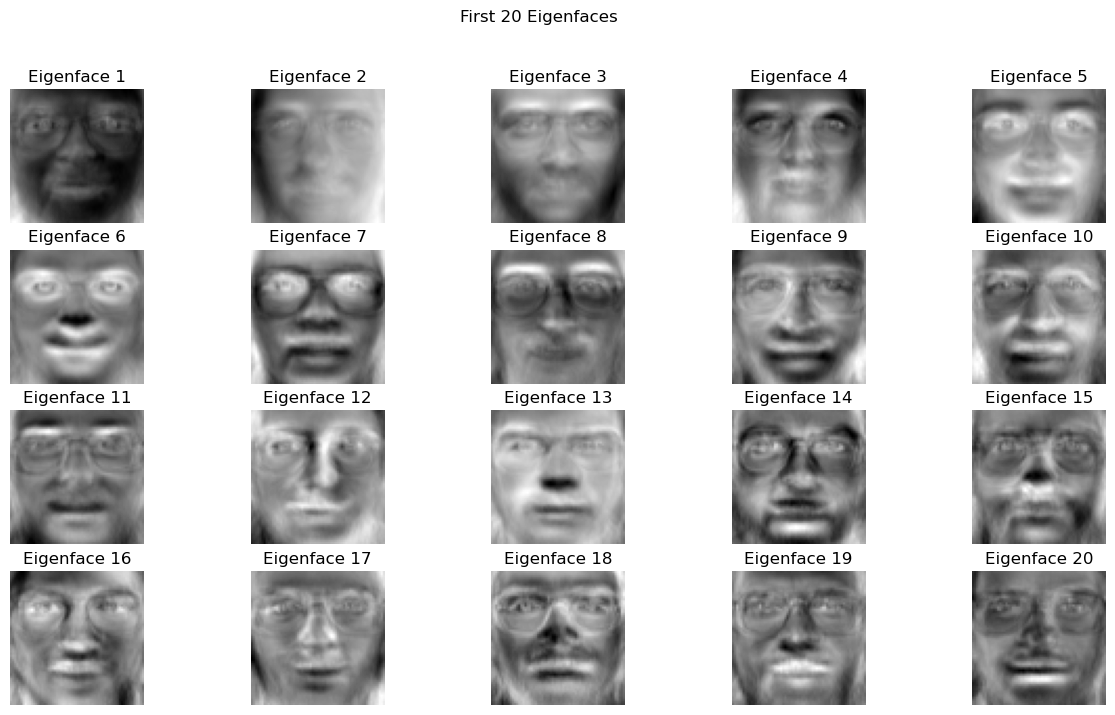

In [18]:


# Eigenfaces would be the principal components reshaped as images
eigenfaces = principal_components.T.reshape((-1, 64, 64))
print("Eigenfaces shape:", eigenfaces.shape)

# Visualize the first 20 eigenfaces
plt.figure(figsize=(15, 8))
for i, eigenface in enumerate(eigenfaces):
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenface.reshape(64, 64), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.suptitle('First 20 Eigenfaces')
plt.show()